In [ ]:
import maboss
import os
import pandas as pd
import sys
# Add parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)
from identification_patients.validation_get_patients_ids import get_patients_valid

from stats.stats_proba import compute_kruskal_test_means_validation
from scipy.stats import kruskal


In [2]:
MODEL_BND = "../models/generic_models/Adeno_lung_Cancer.bnd"
MODEL_CFG = "../models/generic_models/Adeno_lung_Cancer.cfg"
model_lung = maboss.load(MODEL_BND, MODEL_CFG)

In [3]:
input_nodes = ['EGF', 'FGF', 'Androgen', 'TGFb', 'Hypoxia', 'Nutrients', 'Carcinogen', 'Acidosis', 'TNFalpha']

In [4]:
model_lung_zero = model_lung.copy()
for node in input_nodes:
    model_lung_zero.network.set_istate(node, [1, 0])

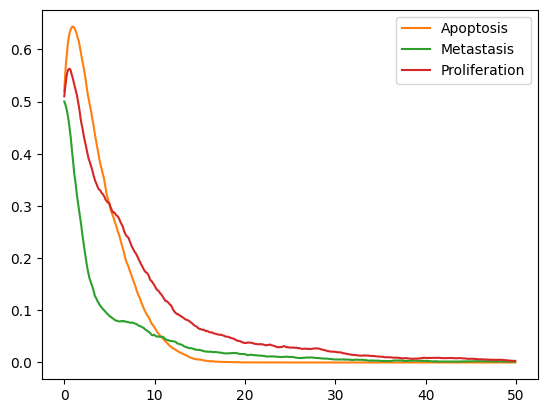

In [5]:
res_lung_zero = model_lung_zero.run()
res_lung_zero.plot_node_trajectory()

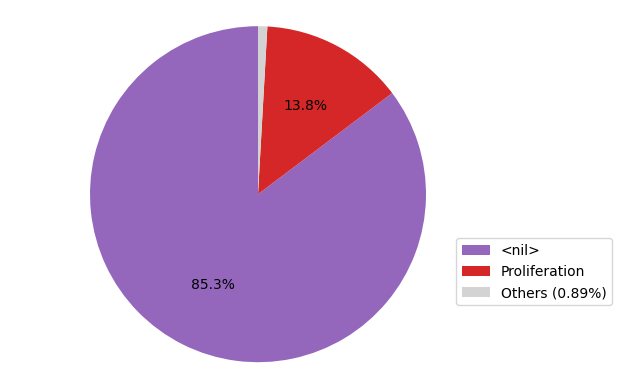

In [6]:
lung_growth = model_lung_zero.copy()
lung_growth.network.set_istate('Nutrients', [0, 1])

res_lung_growth = lung_growth.run()
res_lung_growth.plot_piechart()

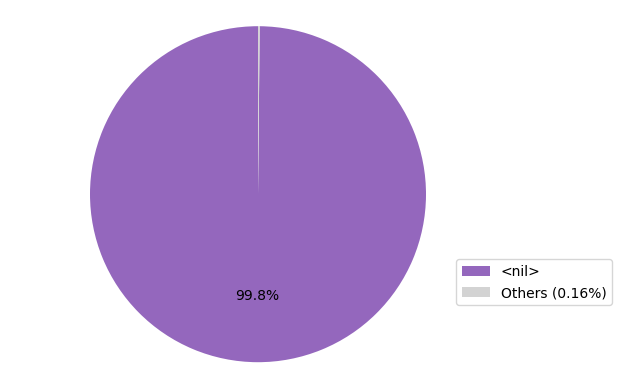

In [7]:
mutant_lung_growth = lung_growth.copy()
mutant_lung_growth.mutate("MYC_MAX", "OFF")
res_mutant_lung_growth = mutant_lung_growth.run()

res_mutant_lung_growth.plot_piechart()
